<a href="https://colab.research.google.com/github/PauloHeriqueCamara/DIRX-1.0/blob/main/DIRX_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 900 images belonging to 3 classes.
Found 900 images belonging to 3 classes.
Found 700 images belonging to 3 classes.
Epoch 1/40
29/29 [==============================] - 23s 705ms/step - loss: 3.0097 - accuracy: 0.4233 - val_loss: 0.6586 - val_accuracy: 0.8367
Epoch 2/40
29/29 [==============================] - 21s 732ms/step - loss: 0.9751 - accuracy: 0.5489 - val_loss: 0.7110 - val_accuracy: 0.7756
Epoch 3/40
29/29 [==============================] - 20s 676ms/step - loss: 0.8181 - accuracy: 0.6189 - val_loss: 0.5029 - val_accuracy: 0.9033
Epoch 4/40
29/29 [==============================] - 20s 701ms/step - loss: 0.8206 - accuracy: 0.6467 - val_loss: 0.4860 - val_accuracy: 0.9122
Epoch 5/40
29/29 [==============================] - 20s 681ms/step - loss: 0.7580 - accuracy: 0.6778 - val_loss: 0.4123 - val_accuracy: 0.9089
Epoch 6/40
29/29 [==============================] - 20s 701ms/step - loss: 0.7297 - accuracy: 0.6889 - val_loss: 0.5724 - val_accuracy: 0.8122
Epoch 7/40
29/29 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 5s 197ms/step


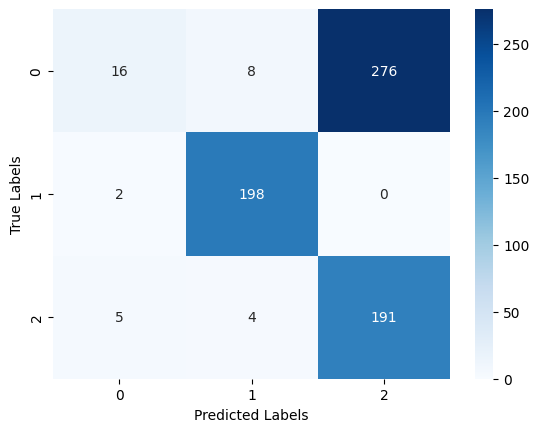

              precision    recall  f1-score   support

     Class 0       0.70      0.05      0.10       300
     Class 1       0.94      0.99      0.97       200
     Class 2       0.41      0.95      0.57       200

    accuracy                           0.58       700
   macro avg       0.68      0.67      0.55       700
weighted avg       0.68      0.58      0.48       700



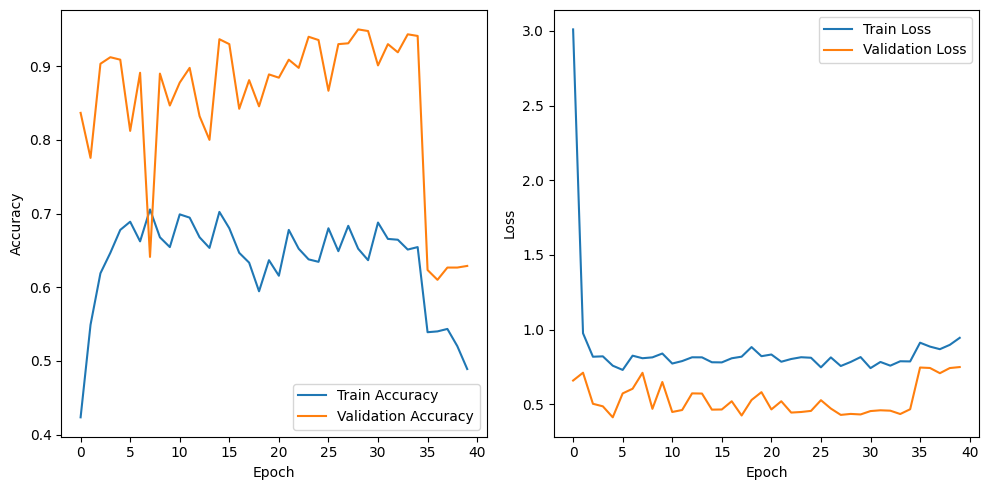

22/22 [==============================] - 3s 152ms/step


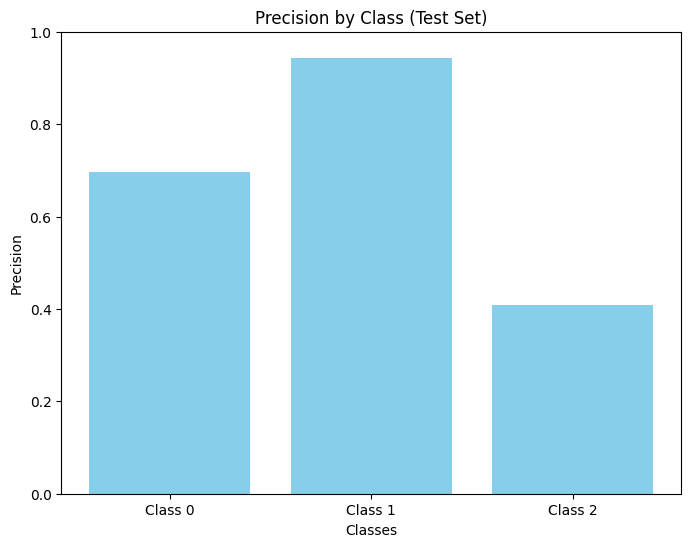

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir os diretórios dos dados de treinamento e validação
train_data_dir = '/content/drive/MyDrive/DIRC/01-TREINAMENTO'
validation_data_dir = '/content/drive/MyDrive/DIRC/02- VALIDACAO'
test_data_dir = '/content/drive/MyDrive/DIRC/03- TESTE'

# Definir o tamanho das imagens de entrada para o modelo VGG19
img_width, img_height = 224, 224

# Definir o tamanho do lote de treinamento
batch_size = 32

# Definir o número de épocas
epochs = 40

# Carregar o modelo VGG19 pré-treinado (sem incluir as camadas densas no topo)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Congelar as camadas convolucionais para que elas não sejam treinadas novamente
for layer in base_model.layers:
    layer.trainable = False

# Criar o modelo sequencial e adicionar o modelo VGG19 como uma camada
model = Sequential()
model.add(base_model)

# Adicionar camadas densas personalizadas para nossa tarefa
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Alterado para 3 classes

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Aumento de dados para treinamento
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Aumento de dados leve para validação e teste (apenas redimensionar e reescalar)
validation_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Carregar os dados de treinamento, validação e teste
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Alterado para classificação de várias classes
    shuffle=True
)

validation_generator = validation_test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Alterado para classificação de várias classes
    shuffle=False
)

test_generator = validation_test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Alterado para classificação de várias classes
    shuffle=False
)

# Treinar o modelo
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Salvar o modelo treinado
model.save('/content/drive/MyDrive/DIRC/modelo_treinado.h5')

# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(test_generator)

# Plotar a matriz de confusão
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Gerar o relatório de classificação
target_names = ['Class 0', 'Class 1', 'Class 2']  # Substitua pelos nomes das suas classes
print(classification_report(y_true, y_pred, target_names=target_names))

# Plotar as métricas de treinamento e validação
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

def predict_class(model, img_path, class_names):
    # Carregar a imagem
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Fazer a previsão usando o modelo
    prediction = model.predict(img_array)

    # Obter a classe prevista (índice da classe com maior probabilidade)
    predicted_class = np.argmax(prediction)

    # Mapear o índice da classe para o nome da classe
    predicted_class_name = class_names[predicted_class]

    return predicted_class_name

# Carregar o modelo treinado
model = load_model('/content/drive/MyDrive/DIRC/modelo_treinado.h5')

# Mapear os índices das classes para os nomes das classes
class_names = ['COVID', 'NORMAL', 'PNEUMONIA']

# Solicitar ao usuário o caminho da imagem
img_path = input("Digite o caminho da imagem: ")

# Realizar a previsão
predicted_class_name = predict_class(model, img_path, class_names)

# Imprimir a classe prevista
print("A imagem é da classe:", predicted_class_name)


Digite o caminho da imagem: /content/drive/MyDrive/Redes convolucionais/IMG RAIO-X/TESTE/COVID/images/COVID-2055.png
1/1 [==============================] - 0s 167ms/step
A imagem é da classe: NORMAL
